In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import scanpy as sc
import scipy as sp

import sys 
import os
sys.path.append(os.path.abspath("./utility_functions"))

import rz_functions as rz
import ng_functions as ng
import rz_utility_spring as srz

from time import time
import seaborn as sns
sns.set_style("whitegrid")


import scrublet as scr


/home/ng136/miniconda3/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


python version: 3.6.10


In [12]:
cluster_annotation_dict =      {'0' : 'N4',
                                '1' : 'Mono_Trx1',
                                '2' : 'Mac1',
                                '3' : 'DC_CCR7+_CXCL9-',
                                '4' : 'N2',
                                '5' : 'DC_Trx1',
                                '6' : 'Th1',
                              'T5' : 'Th17',
                             'T17' : 'Tnaive',
                             'T31' : 'T8',
                                '7' : 'B_KLF2_hi',
                                '8' : 'EC1',
                                '9' : 'DC_Trx2',
                               '10' : 'KC',
                               '11' : 'NK',
                               '12' : 'KClike_MARCO-',
                               '13' : 'B_KLF2_lo',
                               '14' : 'NKT',
                               '15' : 'N3',
                              #'16' : 'Mono_NT',
                               '17' : 'MoDC2',
                               'DC1': 'DC1',
                               '18' : 'pDC',
                               '19' : 'Treg',
                               '20' : 'N1',
                               '21' : 'N5',
                               '22' : 'EC2',
                               '23' : 'Mono_Trx2', #placeholder
                               '24' : 'Basophils',
                               '25' : 'B3',
                               '26' : 'RBC',
                               '27' : 'Hepatocytes',
                               'Mono9' : 'Mono_CD11c-',
                                'Mono12' : 'Mono_CD14-',
                               'Myel15' : 'DC_S100A9+',
                               'Myel19' : 'DC_CD83_lo',
                               'Myel22' : 'KClike_MARCO+'}


coarse_annotation_dict =        {'B1' : 'B cells',
                                 'B2' : 'B cells',
                                 'B3' : 'B cells',
                                 'B_KLF2_hi' : 'B cells',
                                 'B_KLF2_lo' : 'B cells',
                                 'Basophils' : 'Basophils',
                                 'DC_CCR7+_CXCL9-' : 'MoMacDC',
                                 'DC_CD83_lo' : 'MoMacDC',
                                 'DC_NT' : 'MoMacDC',
                                 'DC_S100A9+' : 'MoMacDC',
                                 'DC1' : 'MoMacDC',
                                 'MoDC2' : 'MoMacDC',
                                 'DC2' : 'MoMacDC',
                                 'DC3' : 'MoMacDC',
                                 'DC4' : 'MoMacDC',
                                 'DC_Trx1' : 'MoMacDC',
                                 'DC_Trx2' : 'MoMacDC',
                                 'Mac1' : 'MoMacDC',
                                 'Mac2' : 'MoMacDC',
                                 'Mac3' : 'MoMacDC',
                                 'Mac4' : 'MoMacDC',
                                 'CM' : 'MoMacDC',
                                 'iDC' : 'MoMacDC',
                                 'Mono_NT' : 'MoMacDC',
                                 'Mono_Trx1' : 'MoMacDC',
                                 'Mono_Trx2' : 'MoMacDC',
                                 'Mono_CD11c-' : 'MoMacDC',
                                 'Mono_CD14-' : 'MoMacDC',
                                 'MonoDC' : 'MoMacDC',
                                 'KC' : 'MoMacDC',
                                 'KClike_MARCO-' : 'MoMacDC',
                                 'KClike_MARCO+' : 'MoMacDC',
                                 'N1' : 'Neutrophils',
                                 'N2' : 'Neutrophils',
                                 'N3' : 'Neutrophils',
                                 'N4' : 'Neutrophils',
                                 'N5' : 'Neutrophils',
                                 'N6' : 'Neutrophils',
                                 'NK' : 'NK cells',
                                 'NKT' : 'T cells',
                                 'Th1' : 'T cells',
                                 'Th17' : 'T cells',
                                 'Tmix' : 'T cells',
                                 'T8' : 'T cells',
                                 'Tnaive' : 'T cells',
                                 'Treg' : 'T cells',
                                 'pDC' : 'pDC',
                                 'Hepatocytes' : 'Hepatocytes',
                                 'EC1' : 'Endothelial cells',
                                 'EC2' : 'Endothelial cells',
                                 'RBC' : 'Red blood cells'}

# Data loading, preprocessing and normalization

In [13]:
set(cluster_annotation_dict.values()) - set(coarse_annotation_dict.keys())

set()

In [14]:
adata = sc.read_h5ad('backups/tox_marie_all_cells_unnormalized_pca_umap_leiden_35358x22631_backup_200604_01h08.h5ad') #coarse + fine + scrublet

adata[:,['Il12b']].X = adata[:,['Il12b', 'eYFP']].X.sum(1)
adata[:,['eYFP']].X = 0


sc.pp.normalize_total(adata, target_sum=1e4)

adata.obs['n_counts'] = adata.X.sum(1).A1

adata.obs.head()


,barcode,group,library_name,marker,max_mt,min_tot,mito_frac,n_counts,n_genes,pool,tissue,treatment,leiden,leiden2,doublet_score,predicted_doublet
48-pool1,AAACAAACAGAGGATAAGACACCA,B,Liver_CD45pos_NT_B,CD45pos,0.15,200,0.040964,9999.998047,348,pool1,Liver,NT,8,7,0.007103,False
98-pool1,AAACAAACAGAGGATACAATACTT,B,Liver_CD45pos_NT_B,CD45pos,0.15,200,0.005613,10000.000000,581,pool1,Liver,NT,20,32,0.014590,False
237-pool1,AAACAAACAGAGGATAGGCCCTTA,B,Liver_CD45pos_NT_B,CD45pos,0.15,200,0.035451,9999.998047,470,pool1,Liver,NT,11,14,0.016036,False
246-pool1,AAACAAACAGAGGATAGGGAGGTA,B,Liver_CD45pos_NT_B,CD45pos,0.15,200,0.018000,10000.000000,374,pool1,Liver,NT,Mono12,24,0.027342,False
342-pool1,AAACAAACAGAGGATATGGCTACC,B,Liver_CD45pos_NT_B,CD45pos,0.15,200,0.035088,10000.000000,318,pool1,Liver,NT,T17,17,0.007778,False


In [15]:
#loglikelihoods = sp.sparse.load_npz('backups/loglikelihoods_bay_classif_tox_marie_all_cells_200407_11h02.npz')
logls = np.load('backups/loglikelihoods_bay_classif_tox_marie_all_cells_200407_11h02.npz', allow_pickle=True)

mostlikely_subset = pd.DataFrame(logls['data'], index=logls['index'], columns=logls['columns']).idxmax()
mostlikely_subset = pd.Series(mostlikely_subset, dtype='category')
mostlikely_subset.index = adata.obs.index

mostlikely_celltype = mostlikely_subset.map(ng.cell_subset_dict).astype('category')

In [16]:
adata.obs['cell_type'] = mostlikely_celltype
adata.obs['minor_subset'] = mostlikely_subset

#annotate color palette in adata.uns
adata.uns['cell_type_colors'] = adata.obs['cell_type'].cat.categories.map(ng.cell_type_cmap).tolist()
adata.uns['minor_subset_colors'] = adata.obs['minor_subset'].cat.categories.map(ng.cell_subset_cmap).tolist()

In [17]:
adata = adata[~(adata.obs.predicted_doublet)]
adata = adata[~adata.obs['leiden'].isin(['16', '28','29','30'])]

adata.obs['leiden_minor_subset'] = adata.obs.leiden.map(cluster_annotation_dict).astype('category')
adata.obs['leiden_cell_type'] = adata.obs.leiden_minor_subset.map(coarse_annotation_dict).astype('category')


Trying to set attribute `.obs` of view, copying.


[<Figure size 2748x400 with 4 Axes>]

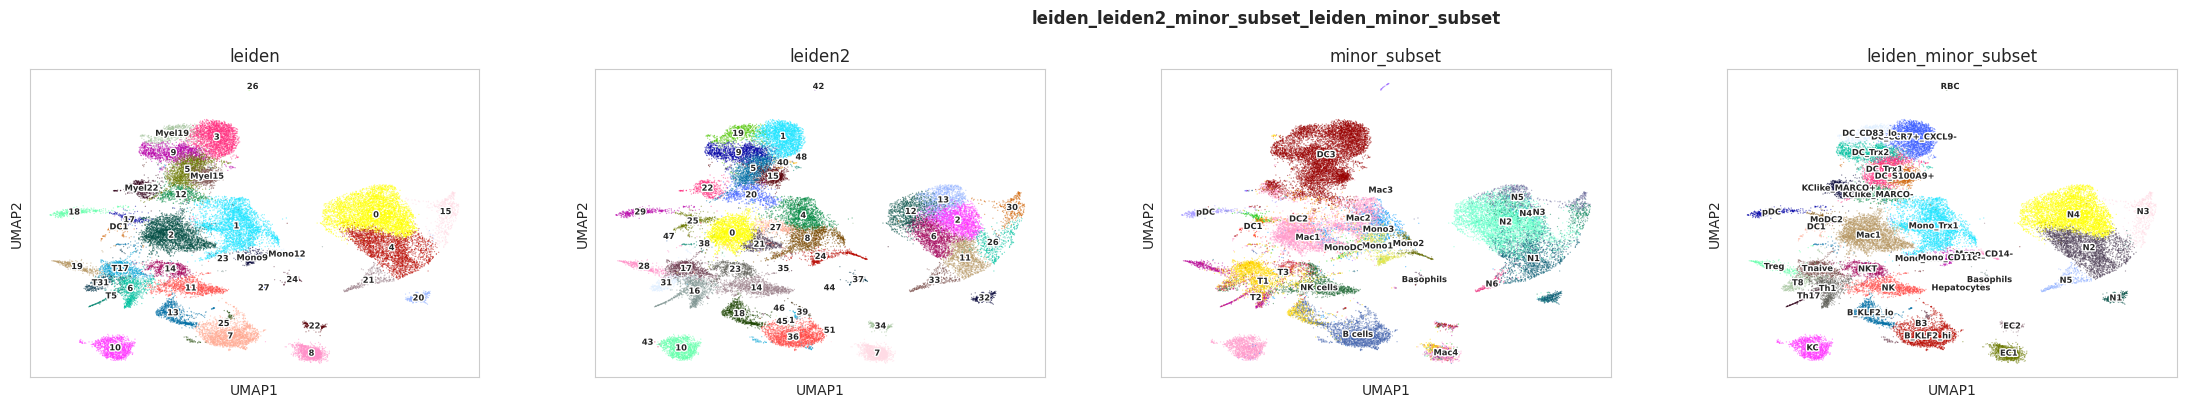

In [18]:
ng.umap_plot(adata, color=['leiden','leiden2', 'minor_subset', 'leiden_minor_subset'], return_fig=True, save_fig=False, alpha=0.5)

# RZ cluster characterization

In [19]:
leiden_cell_type_counts = adata.obs.groupby('leiden_minor_subset').library_name.value_counts().to_frame(name='count').reset_index().pivot(index='leiden_minor_subset',columns='library_name', values='count')
leiden_cell_type_percentages = leiden_cell_type_counts.div(leiden_cell_type_counts.sum(axis=0), axis=1).fillna(0)
leiden_cell_type_percentages_melt = leiden_cell_type_percentages.reset_index().melt(id_vars='leiden_minor_subset')

In [20]:
#leiden_cell_type_percentages_melt.groupby('leiden_minor_subset').agg('count')

In [21]:
fig, ax = plt.subplots(1, figsize=(8,240))
bp = sns.barplot(data=leiden_cell_type_percentages_melt, y='leiden_minor_subset', x='value', hue='library_name')

#library_labels = leiden_cell_type_percentages_melt.library_name.unique().tolist() * leiden_cell_type_percentages_melt.leiden_minor_subset.unique().__len__()
library_labels = [a for a in leiden_cell_type_percentages_melt.library_name.unique().tolist() for _ in range(leiden_cell_type_percentages_melt.leiden_minor_subset.unique().__len__())]
for i, p in enumerate(ax.patches):
    ax.annotate(library_labels[i],
                (p.get_x() + p.get_width(), p.get_y() + 0.0),
                xytext=(5, -6), textcoords='offset points', fontsize=7)

ax.get_legend().remove()
fig._set_dpi(200)

plt.savefig('figures/library_representation_all_cell_{}.png'.format(ng.now()))

fig.clear()

<Figure size 1600x48000 with 0 Axes>

In [149]:
#?pd.read_excel

In [26]:
il12b_genelist = pd.read_excel('Il12b_annotation/MS30 Tox scRNAseq Gene lists for IL12b+ TPMs.xlsx', skiprows=1, usecols=range(3), names=['Category', 'Gene', 'Notes'])#.fillna(method='pad')
il12b_genelist['Category'] = il12b_genelist['Category'].fillna(method='pad')
il12b_genelist = il12b_genelist.dropna(thresh=2)
il12b_genelist.Gene = il12b_genelist.Gene.map(lambda s : s.replace('*','').replace('CD','Cd'))

In [35]:
il12b_types = ['DC_CCR7+_CXCL9-', 'DC_CD83_lo', 'DC_Trx2', 'DC_Trx1', 'DC_S100A9+', 'KClike_MARCO-', 'KClike_MARCO+']
dclike_types = ['DC1', 'MoDC2', 'DC_CCR7+_CXCL9-', 'DC_CD83_lo', 'DC_Trx2', 'DC_Trx1', 'DC_S100A9+', 'KClike_MARCO-', 'KClike_MARCO+']

In [36]:
bp_genes = il12b_genelist.query('Category == "cDC1,2,moDC lost with trx"').Gene.values#['Cd209a', 'Naaa']

In [37]:
tmpdata = adata[adata.obs.leiden_minor_subset.isin(il12b_types), adata.var_names.isin(bp_genes)]
bp_df = tmpdata.obs.merge(pd.DataFrame(tmpdata.X.todense(), index=tmpdata.obs.index, columns = bp_genes), left_index=True, right_index=True).loc[:,['leiden_minor_subset',*bp_genes]].melt(id_vars='leiden_minor_subset', var_name='Gene', value_name='Expression')
#tmpdata.obs = tmpdata.obs.merge(pd.DataFrame(tmpdata.X.todense(), index=tmpdata.obs.index, columns = bp_genes), left_index=True, right_index=True)

In [72]:
cat = il12b_genelist.Category.unique()[0]

bp_genes = il12b_genelist[il12b_genelist.Category == cat].Gene.values

tmpdata = adata[adata.obs.leiden_minor_subset.isin(il12b_types), adata.var_names.isin(bp_genes)]
bp_df = tmpdata.obs.merge(pd.DataFrame(tmpdata.X.todense(), index=tmpdata.obs.index, columns = bp_genes), left_index=True, right_index=True).loc[:,['leiden_minor_subset',*bp_genes]].melt(id_vars='leiden_minor_subset', var_name='Gene', value_name='Expression')
bp_df.leiden_minor_subset = bp_df.leiden_minor_subset.cat.reorder_categories(il12b_types)

# fig, ax = plt.subplots(1, figsize=(5*len(bp_genes),8))
# sns.barplot(data=bp_df, x='Gene', hue='leiden_minor_subset', y='Expression', ci=95, ax=ax).set_title(cat, fontsize=24)
# ax.set_xlabel('Gene', fontsize=18)
# ax.set_ylabel('Normalized counts', fontsize=18)
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
# plt.rc('legend', fontsize=20)


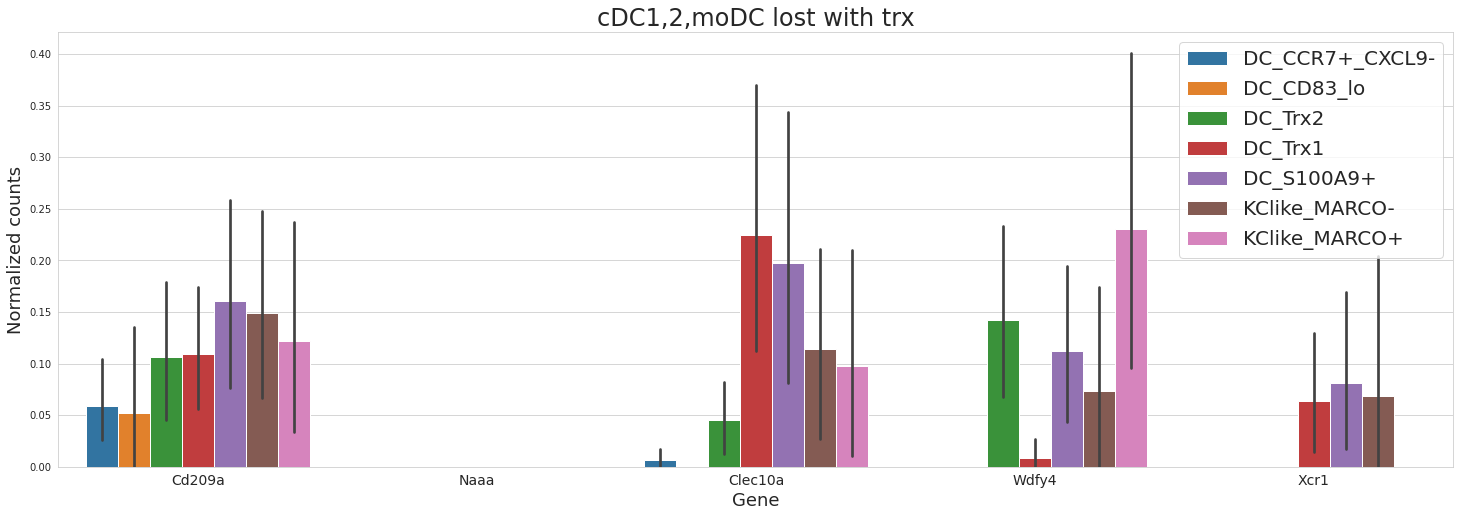

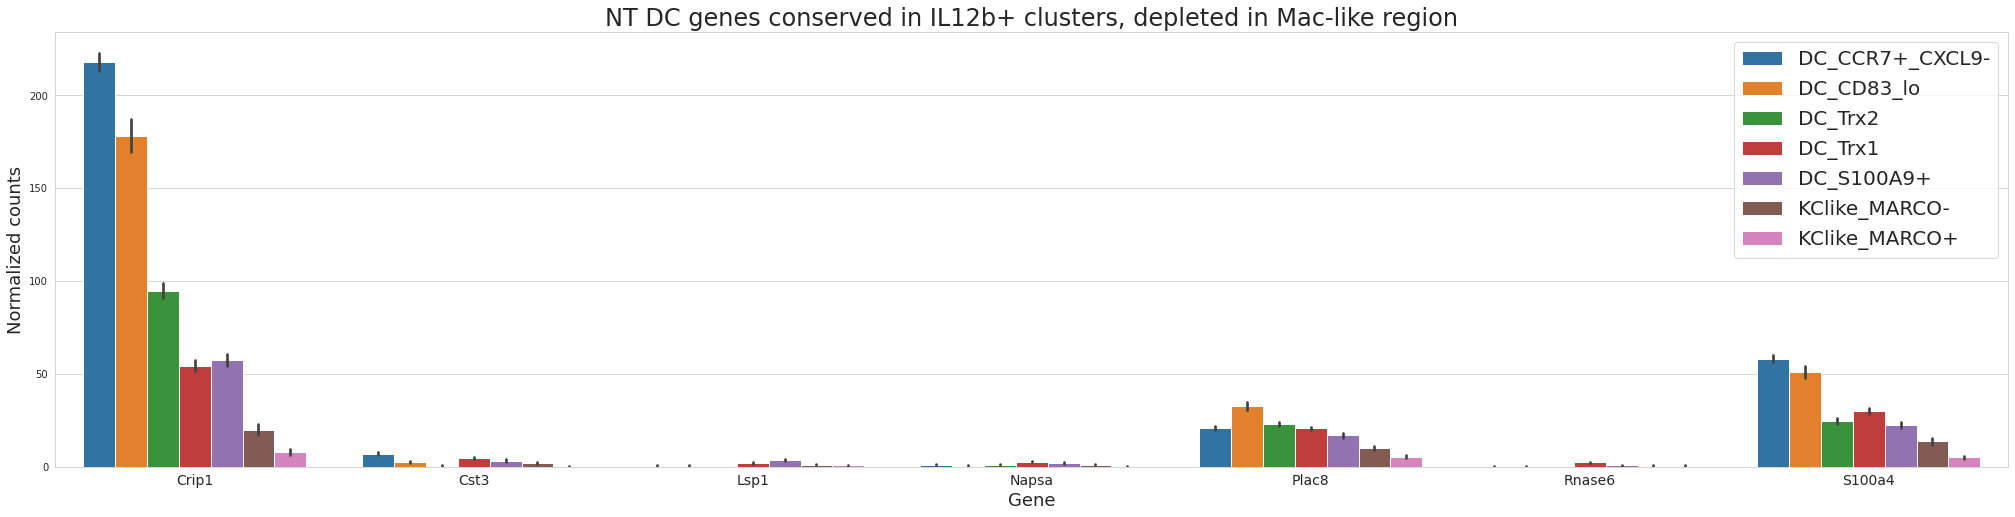

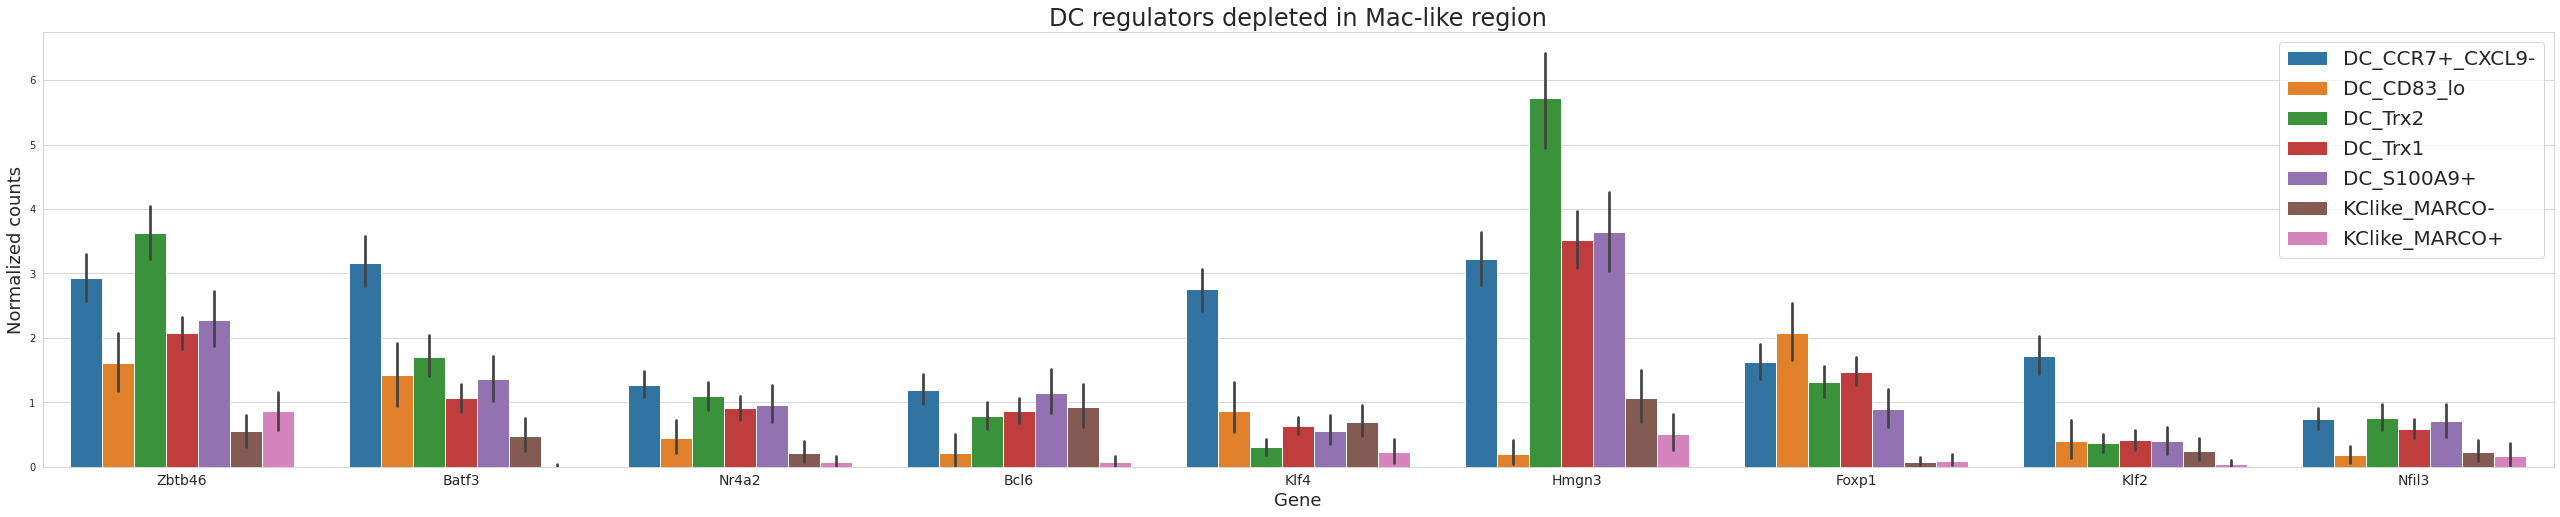

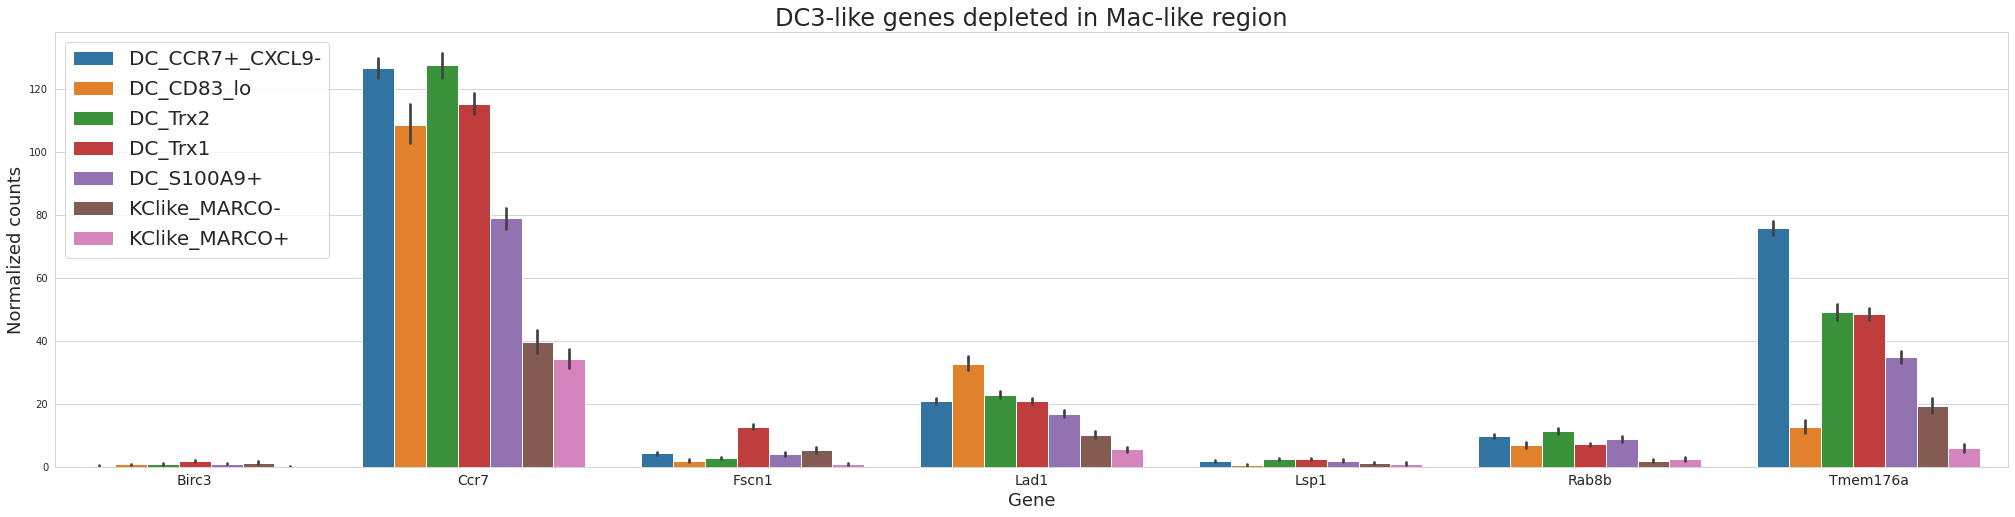

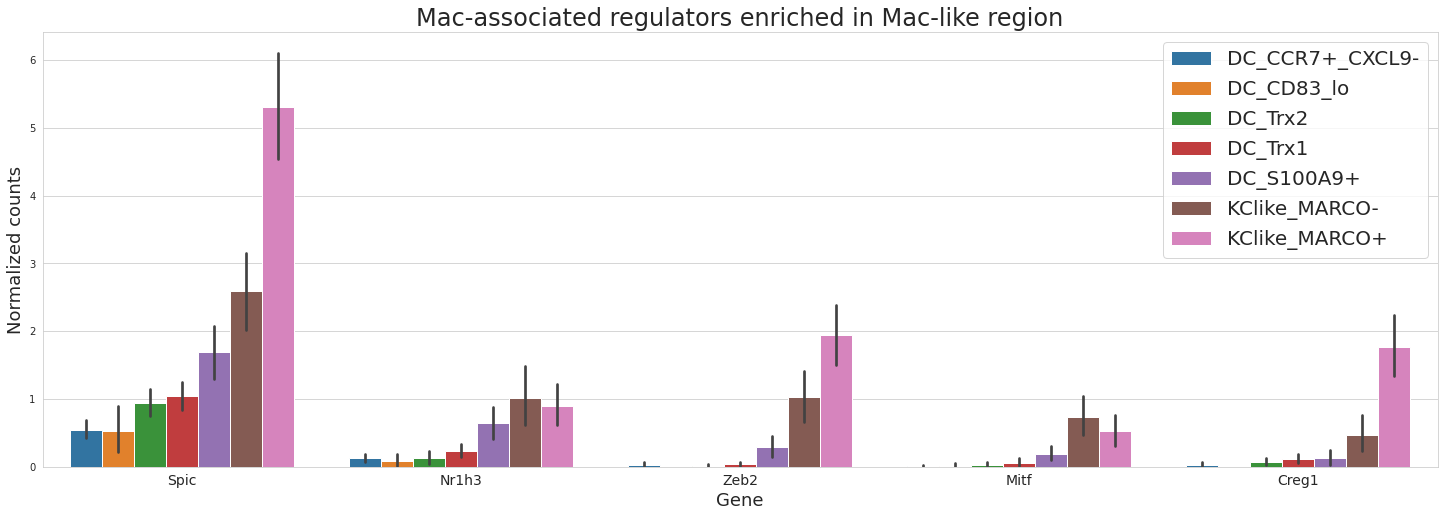

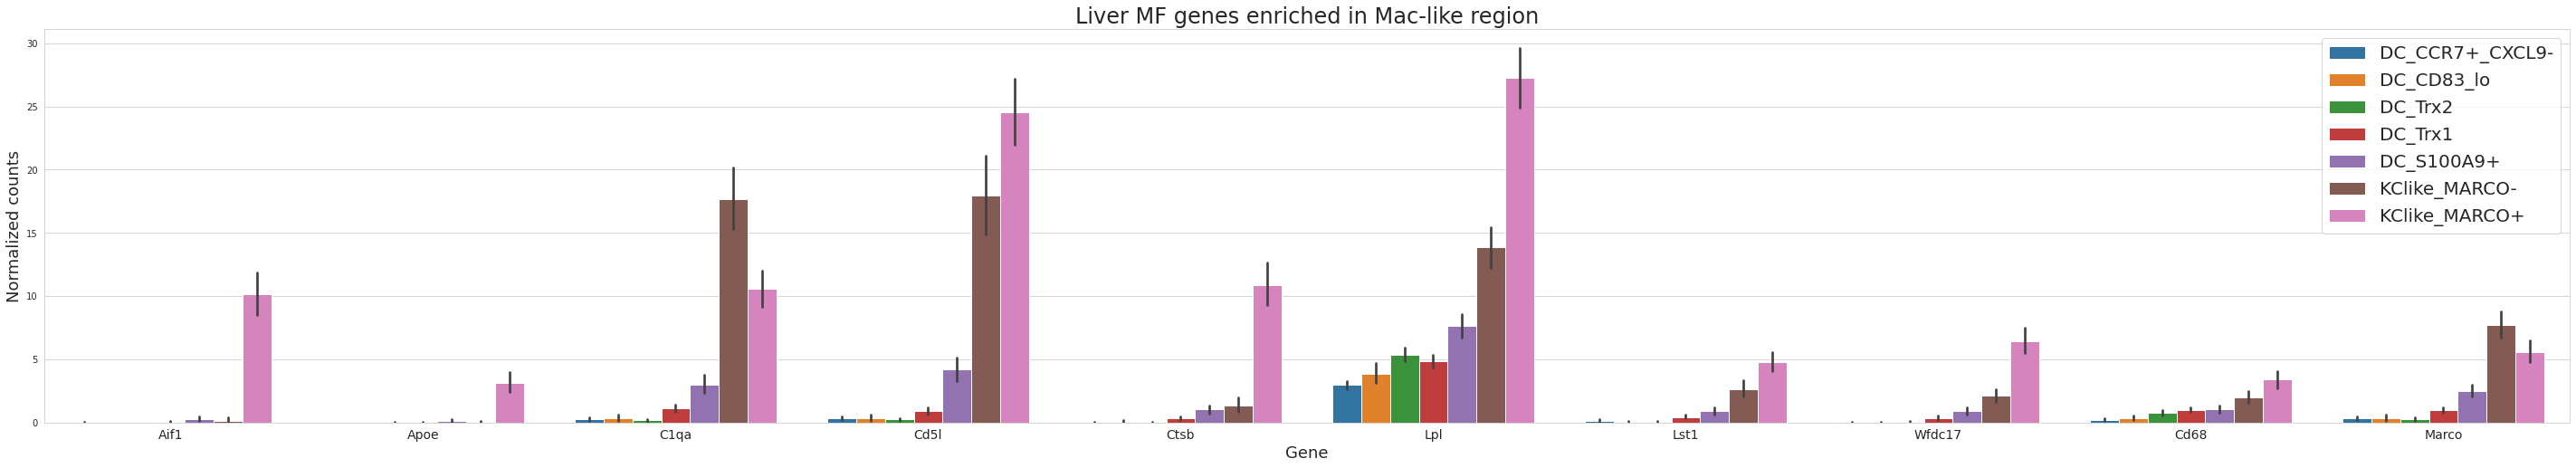

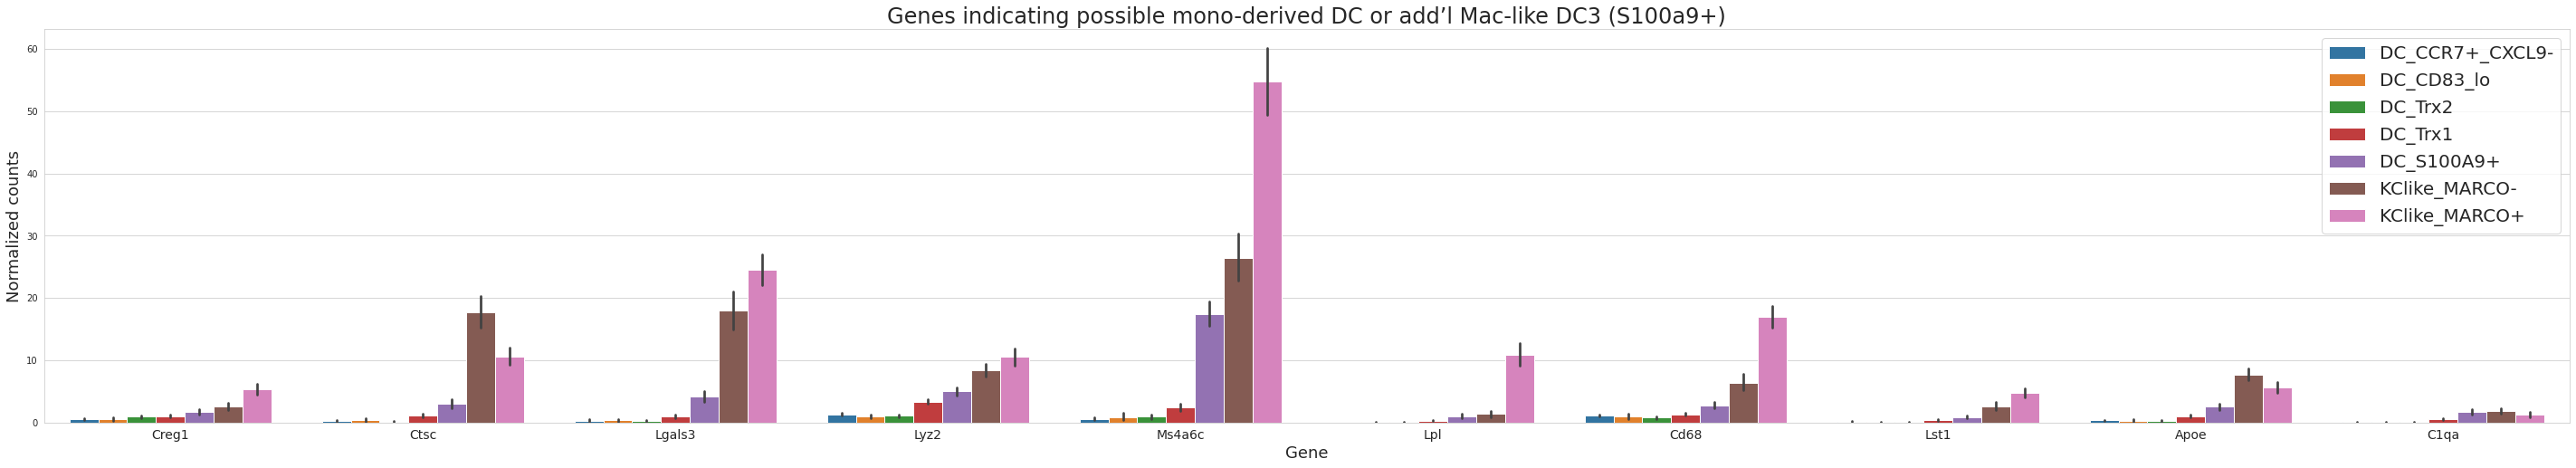

In [79]:
for cat in il12b_genelist.Category.unique():
    
    bp_genes = il12b_genelist[il12b_genelist.Category == cat].Gene.values
    
    tmpdata = adata[adata.obs.leiden_minor_subset.isin(il12b_types), adata.var_names.isin(bp_genes)]
    bp_df = tmpdata.obs.merge(pd.DataFrame(tmpdata.X.todense(), index=tmpdata.obs.index, columns = bp_genes), left_index=True, right_index=True).loc[:,['leiden_minor_subset',*bp_genes]].melt(id_vars='leiden_minor_subset', var_name='Gene', value_name='Expression')
    bp_df.leiden_minor_subset = bp_df.leiden_minor_subset.cat.reorder_categories(il12b_types)
    
    fig, ax = plt.subplots(1, figsize=(5*len(bp_genes),8))
    sns.barplot(data=bp_df, x='Gene', hue='leiden_minor_subset', y='Expression', ci=95, ax=ax).set_title(cat, fontsize=24)
    ax.set_xlabel('Gene', fontsize=18)
    ax.set_ylabel('Normalized counts', fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    #plt.rc('legend', fontsize=20)
    #plt.rcParams['legend.title_fontsize'] = 24
    plt.legend(fontsize='20', title_fontsize='20')

    
    fig.savefig('figures/il12b_annotation/il12b_annotation_{c}_{now}.pdf'.format(c=ng.fix_filename(cat), now=ng.now()), dpi=200)

    plt.show()

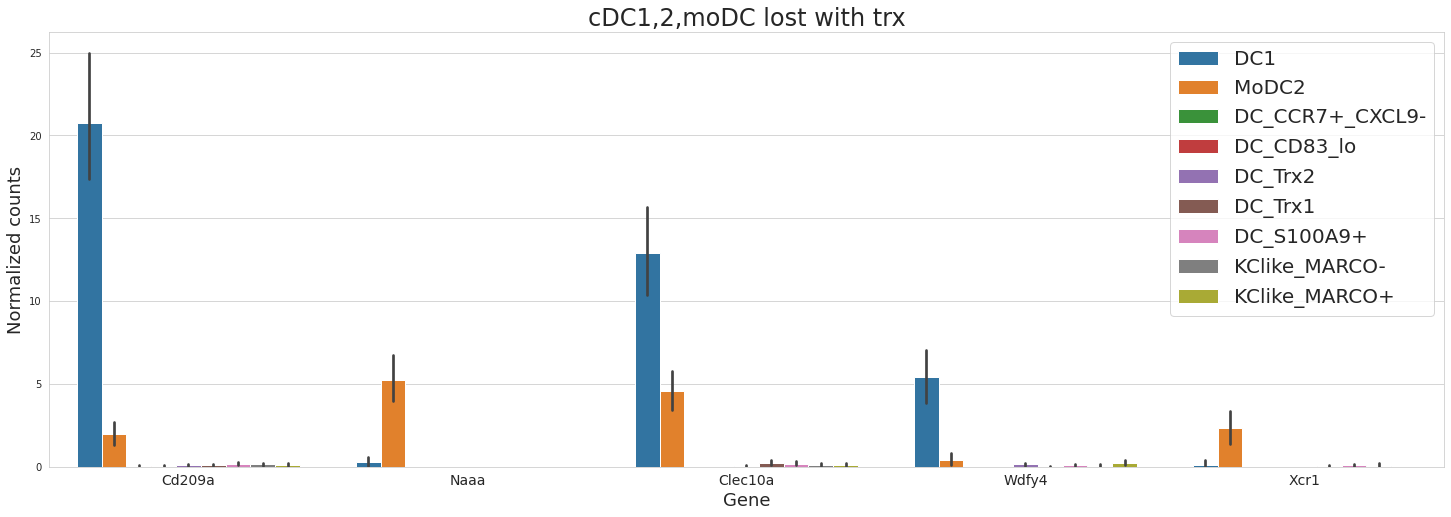

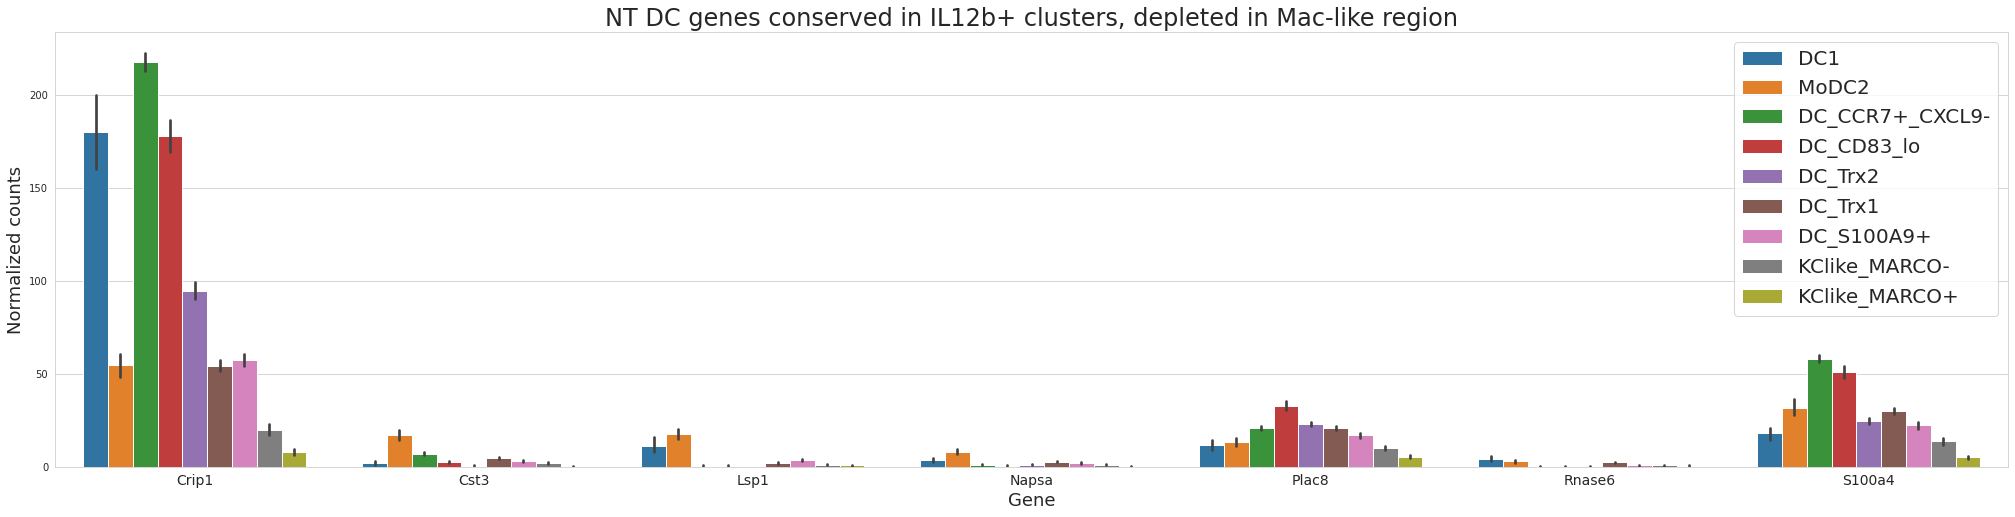

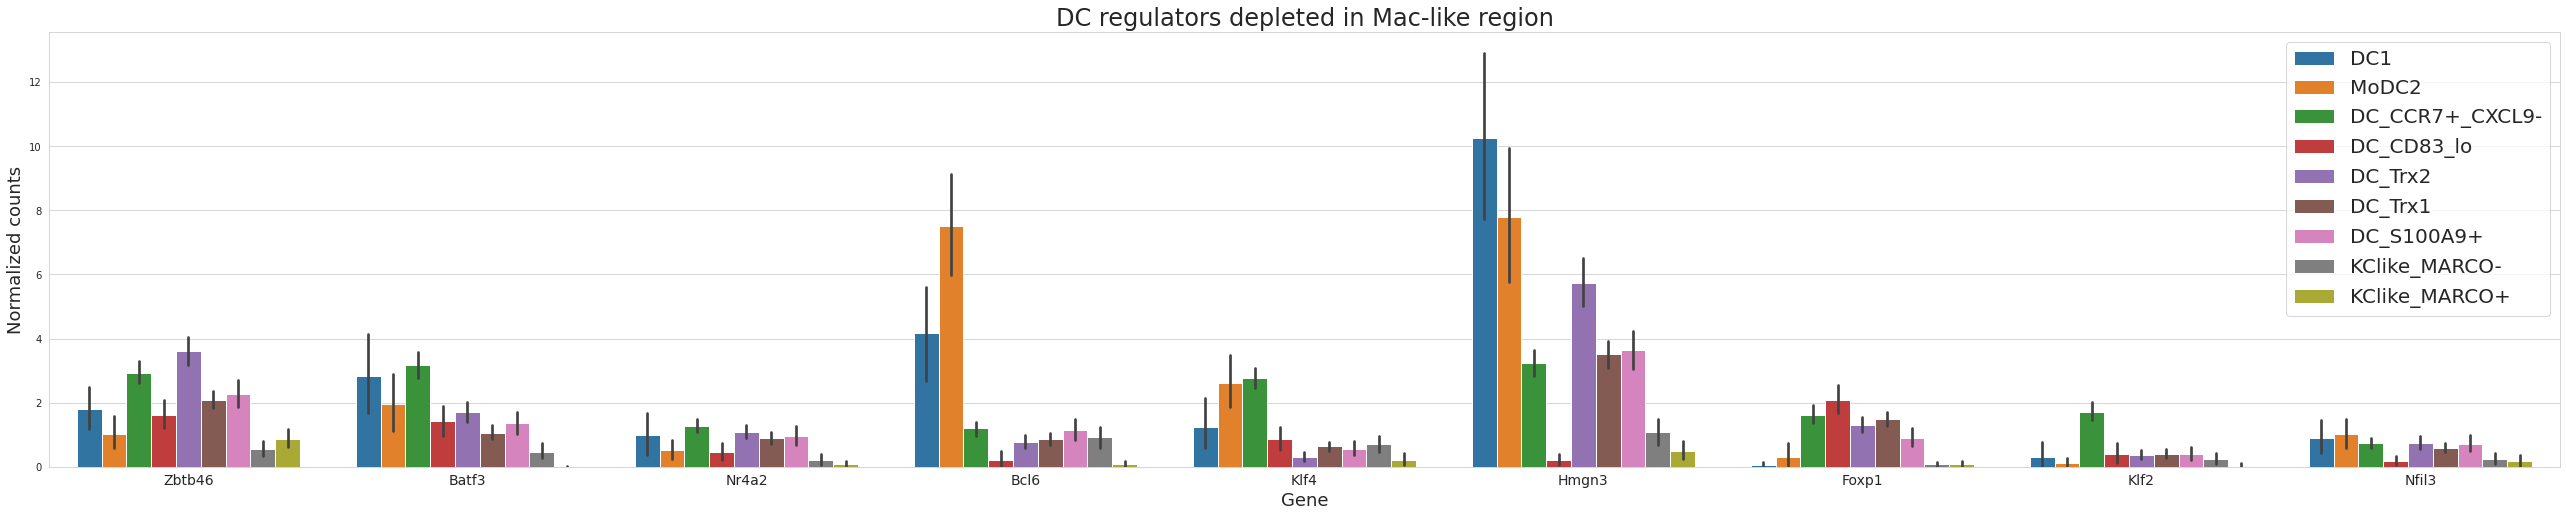

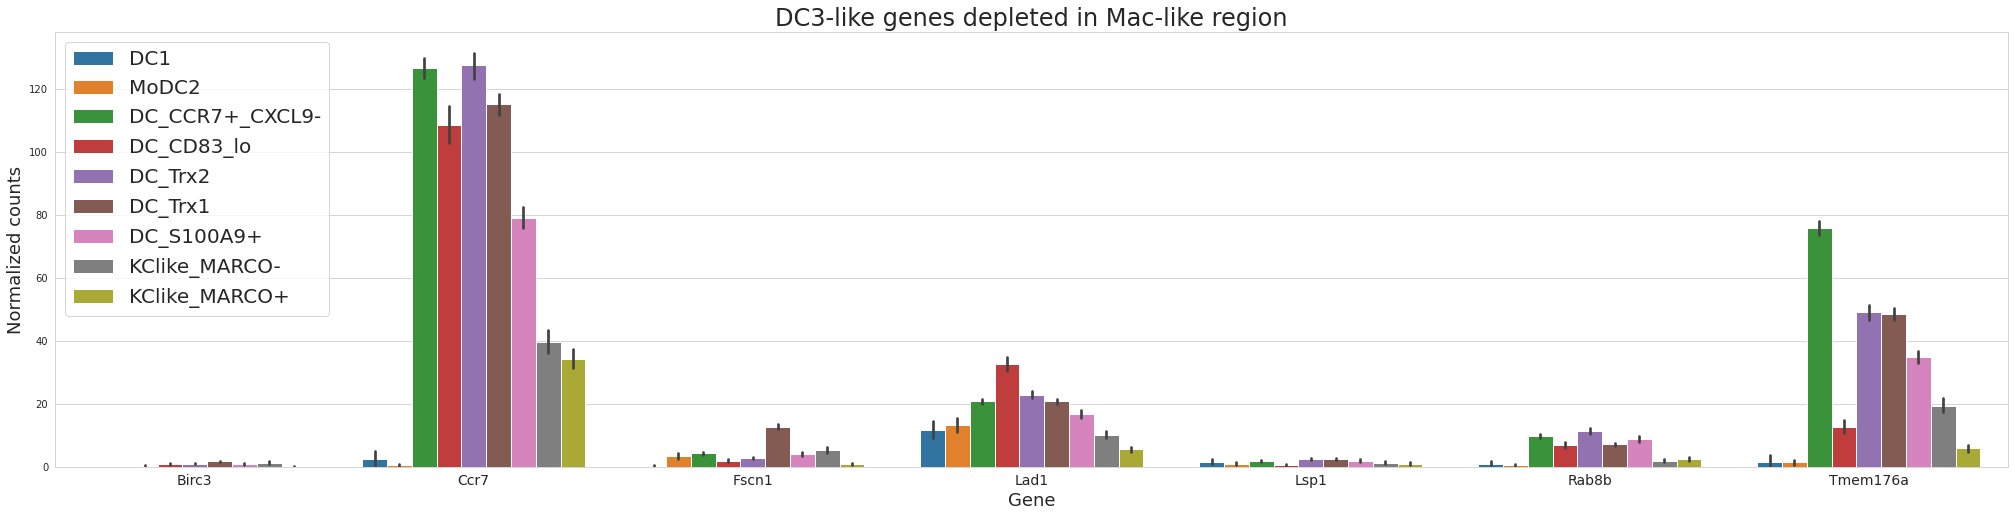

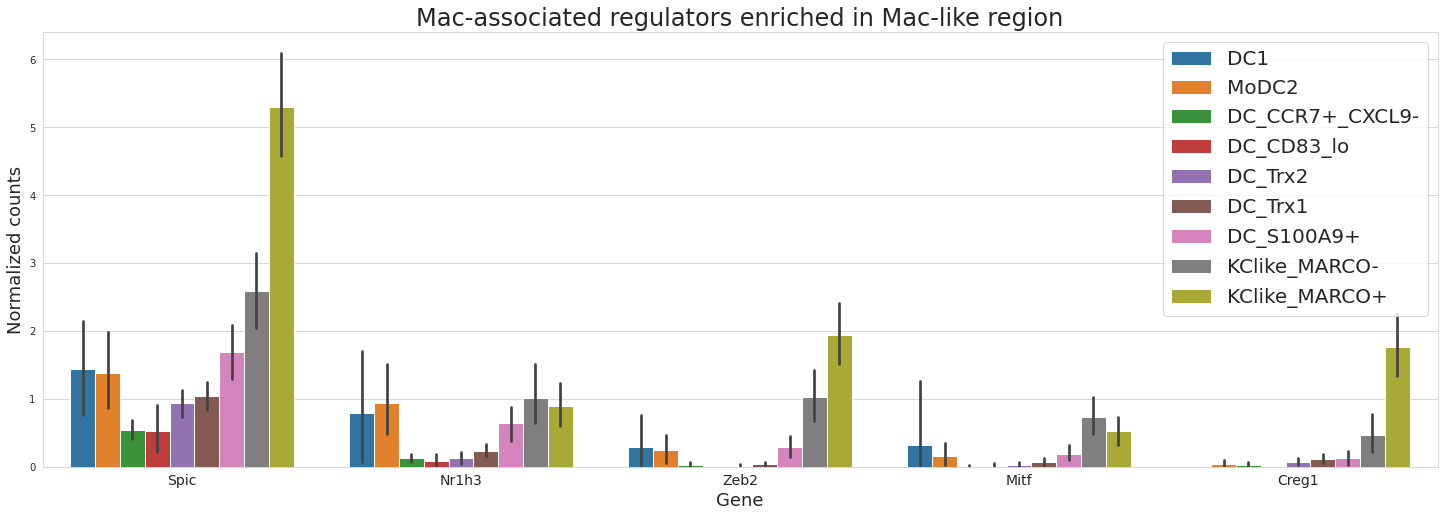

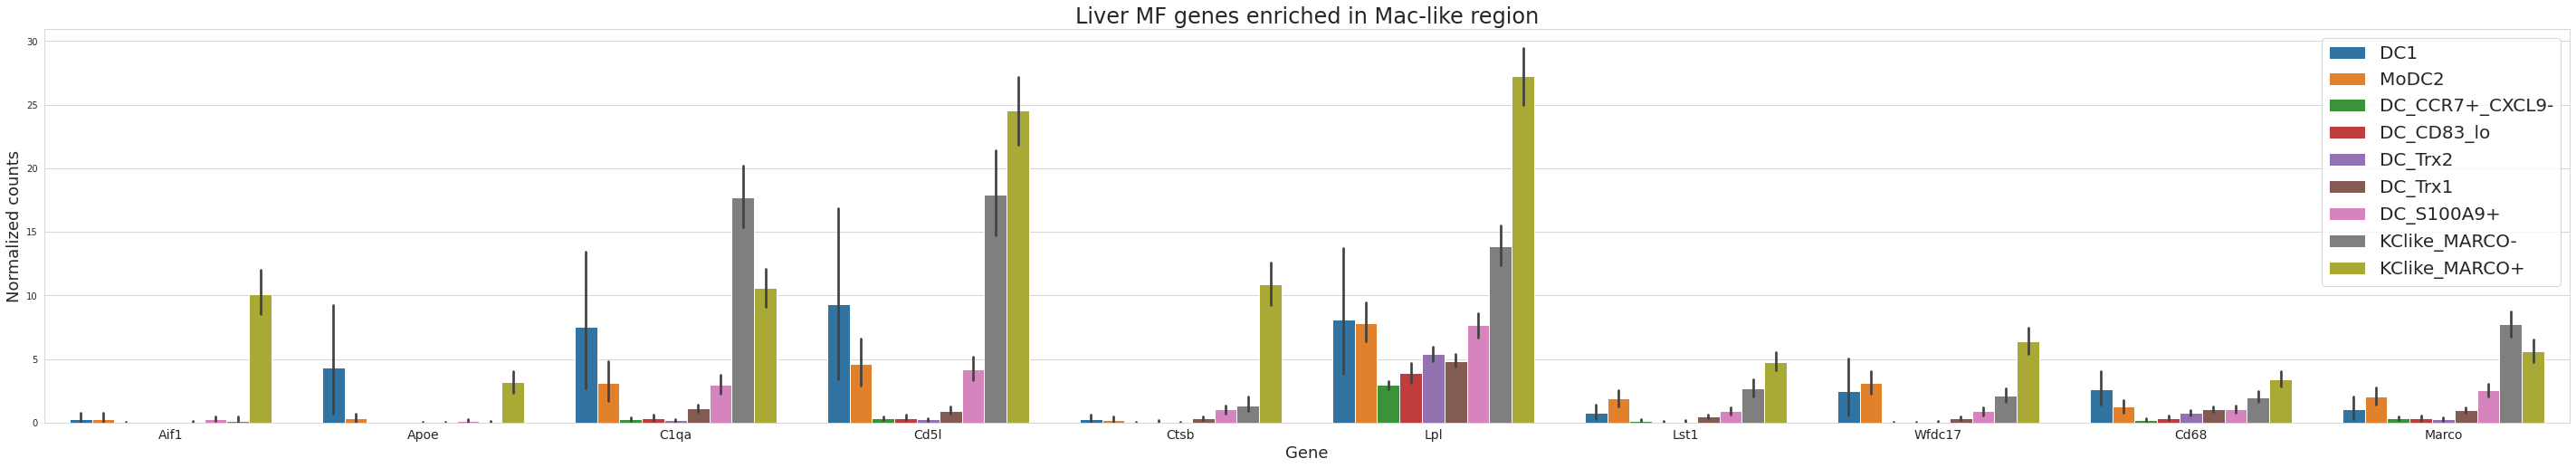

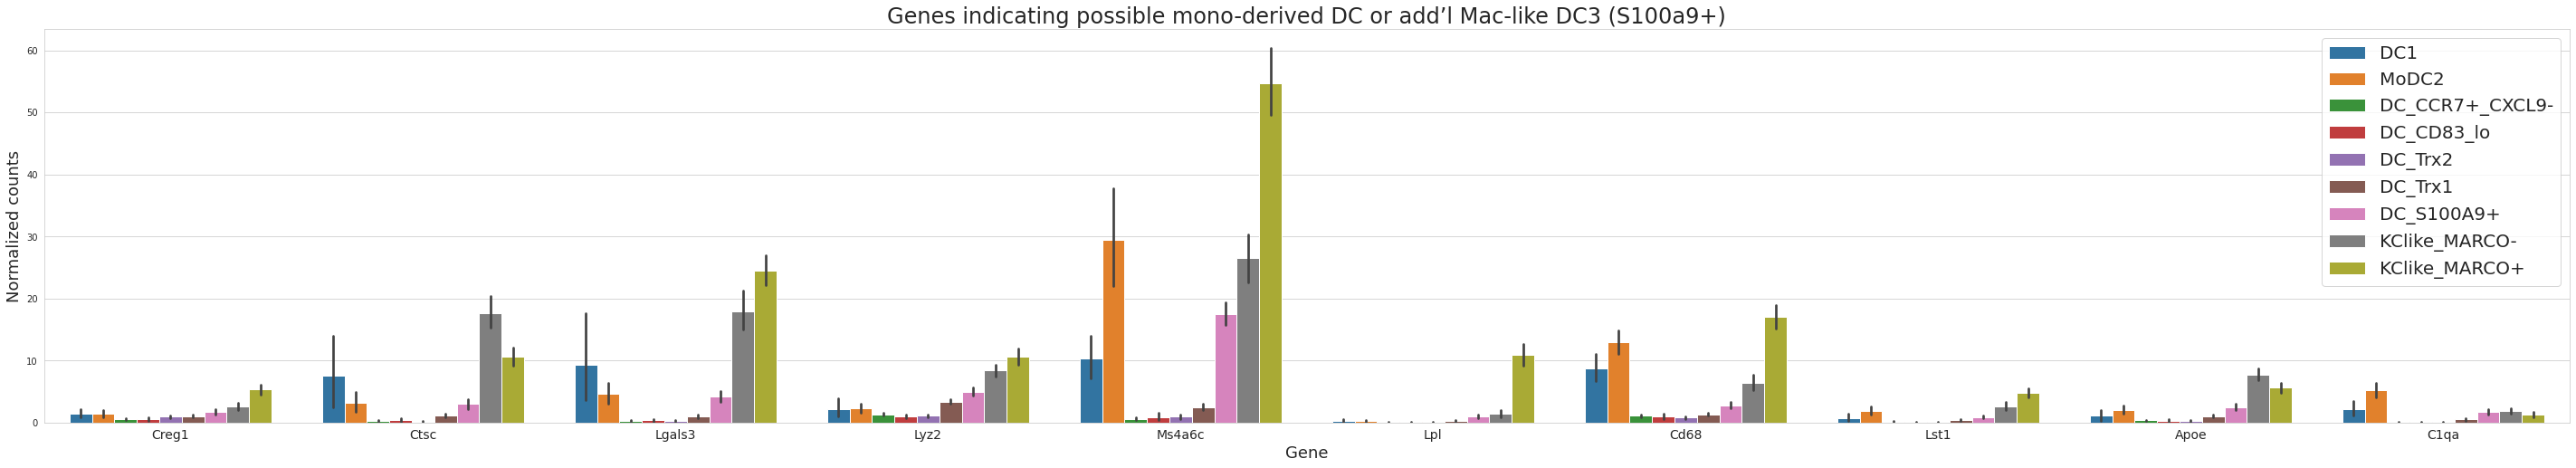

In [78]:
for cat in il12b_genelist.Category.unique():
    
    bp_genes = il12b_genelist[il12b_genelist.Category == cat].Gene.values
    
    tmpdata = adata[adata.obs.leiden_minor_subset.isin(dclike_types), adata.var_names.isin(bp_genes)]
    bp_df = tmpdata.obs.merge(pd.DataFrame(tmpdata.X.todense(), index=tmpdata.obs.index, columns = bp_genes), left_index=True, right_index=True).loc[:,['leiden_minor_subset',*bp_genes]].melt(id_vars='leiden_minor_subset', var_name='Gene', value_name='Expression')
    bp_df.leiden_minor_subset = bp_df.leiden_minor_subset.cat.reorder_categories(dclike_types)
    
    fig, ax = plt.subplots(1, figsize=(5*len(bp_genes),8))
    sns.barplot(data=bp_df, x='Gene', hue='leiden_minor_subset', y='Expression', ci=95, ax=ax).set_title(cat, fontsize=24)
    ax.set_xlabel('Gene', fontsize=18)
    ax.set_ylabel('Normalized counts', fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    #plt.rc('legend', fontsize=20)
    #plt.rcParams['legend.title_fontsize'] = 24
    plt.legend(fontsize='20', title_fontsize='20')

    
    fig.savefig('figures/il12b_annotation/dclike_annotation_{c}_{now}.pdf'.format(c=ng.fix_filename(cat), now=ng.now()), dpi=200)

    plt.show()

In [261]:
il12b_genelist.Category.unique()

array(['cDC1,2,moDC lost with trx',
       'NT DC genes conserved in IL12b+ clusters, depleted in Mac-like region',
       'DC regulators depleted in Mac-like region',
       'DC3-like genes depleted in Mac-like region',
       'Mac-associated regulators enriched in Mac-like region',
       'Liver MF genes enriched in Mac-like region',
       'Genes indicating possible mono-derived DC or add’l Mac-like DC3 (S100a9+)'],
      dtype=object)

In [257]:
il12b_genelist.groupby('Category').agg('count')

,Gene,Notes
Category,,
DC regulators depleted in Mac-like region,9,1
DC3-like genes depleted in Mac-like region,7,0
Genes indicating possible mono-derived DC or add’l Mac-like DC3 (S100a9+),10,1
Liver MF genes enriched in Mac-like region,10,10
Mac-associated regulators enriched in Mac-like region,5,5
"NT DC genes conserved in IL12b+ clusters, depleted in Mac-like region",7,3
"cDC1,2,moDC lost with trx",5,0


In [10]:
tox_classes_probabilities = nb_probs.merge(adata.obs.loc[:,['leiden_minor_subset', 'leiden_cell_type']], left_index=True, right_index=True)


In [11]:
clf_validation = tox_classes_probabilities.groupby('leiden_minor_subset').agg('mean').sort_index(axis=1, inplace=False).sort_index(axis=0, inplace=False)
clf_validation = clf_validation.loc[sorted(clf_validation),:]

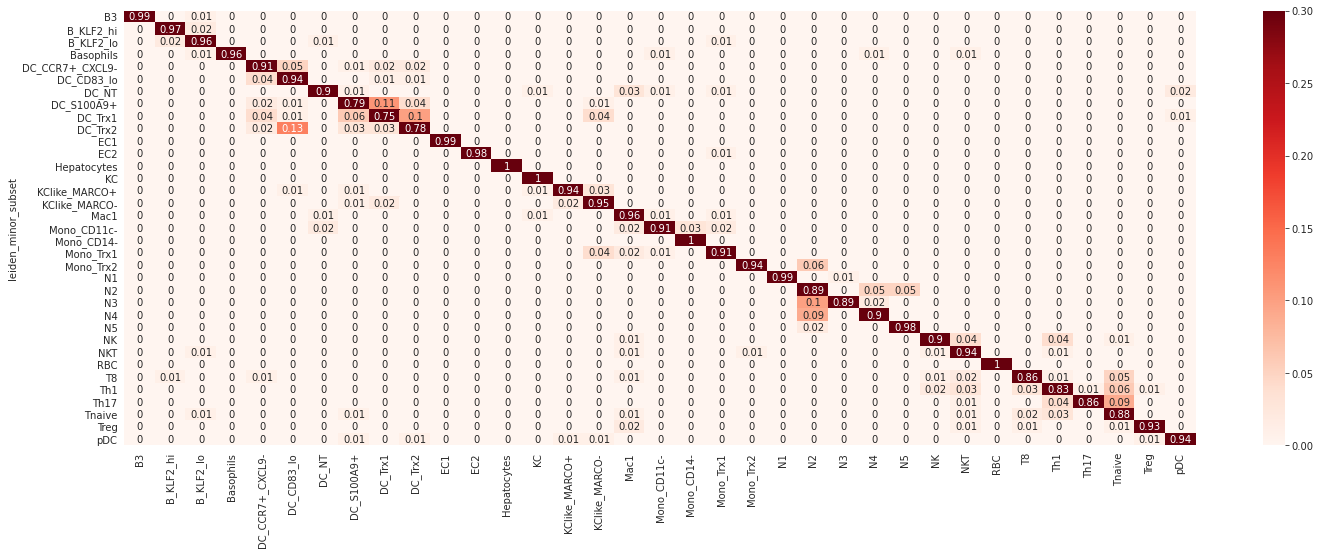

In [12]:
plt.figure(figsize=(24,8))
sns.heatmap(round(clf_validation,2), annot=True, cmap='Reds', vmax=0.3)

plt.show()

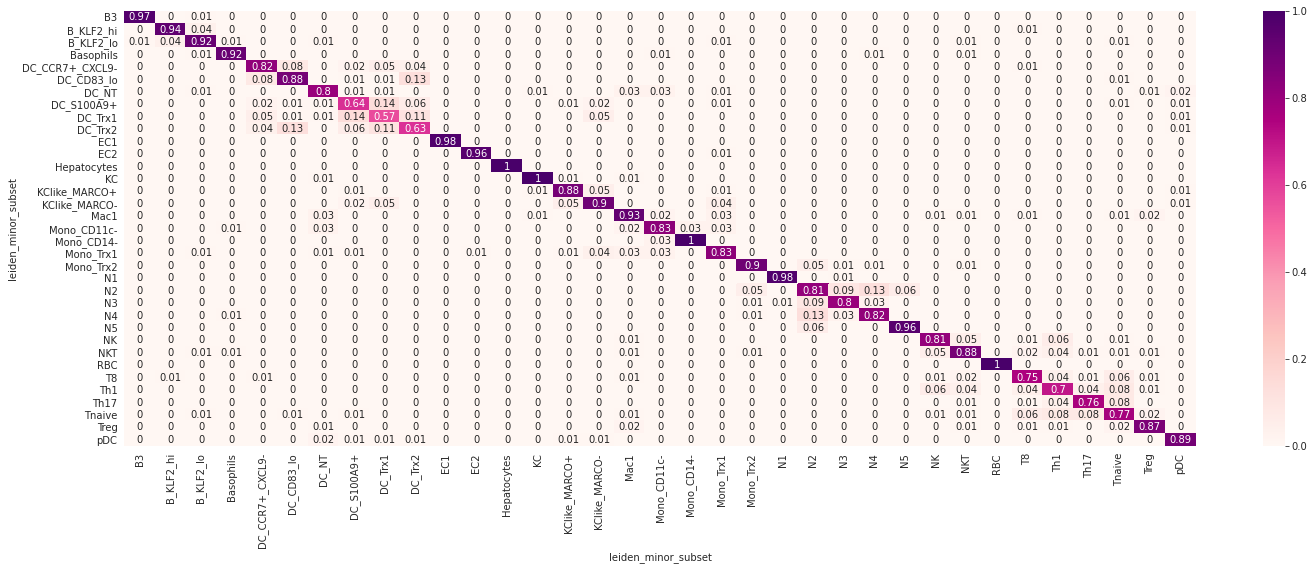

In [25]:
plt.figure(figsize=(24,8))
sns.heatmap(round(clf_validation @ clf_validation.T,2), annot=True, cmap='RdPu', vmax=1.0)

plt.show()

In [151]:
most_likely_leiden = logls_leiden.idxmax()
most_likely_leiden.index = adata.obs.index

In [160]:
tox_to_tox = adata.obs.loc[:,['leiden_minor_subset', 'leiden_cell_type']].merge(most_likely_leiden.rename('most_likely_leiden'), left_index=True, right_index=True).groupby(['leiden_minor_subset', 'most_likely_leiden']).size().groupby(level=0).apply(lambda x : x/sum(x)).reset_index(name='fraction').pivot(index='leiden_minor_subset', columns='most_likely_leiden')

In [162]:
tox_to_tox.columns = tox_to_tox.columns.get_level_values('most_likely_leiden')

In [164]:
tox_to_tox = tox_to_tox.loc[sorted(tox_to_tox),:]

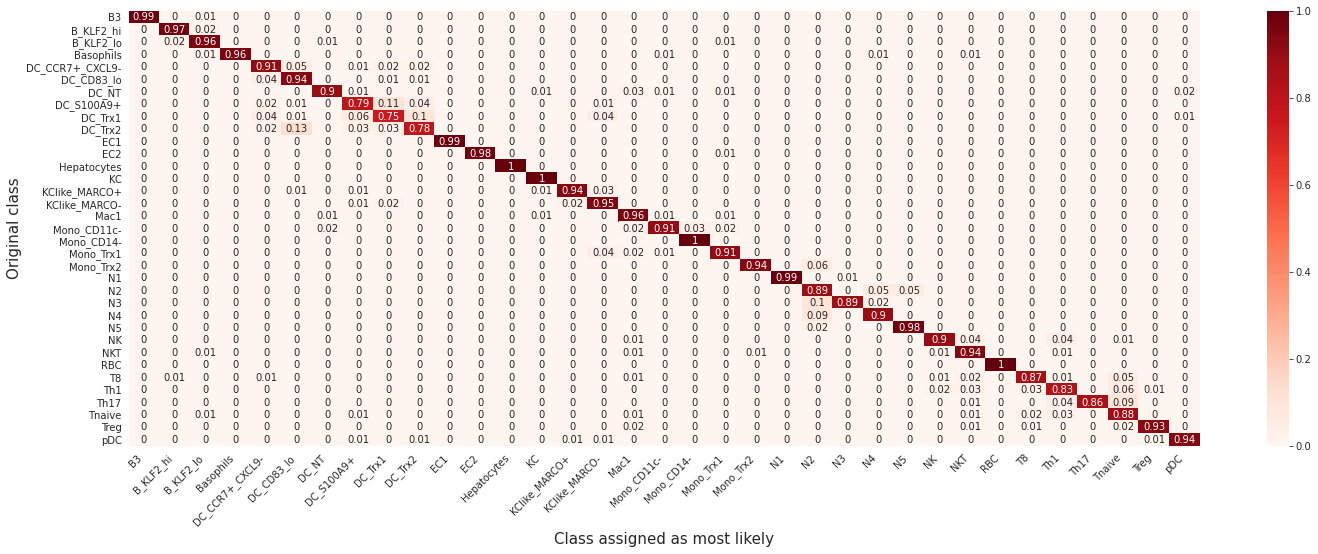

In [165]:
plt.figure(figsize=(24,8))
heatmap(round(tox_to_tox,2), annot=True, cmap='Reds')

plt.ylabel('Original class', fontsize=15)
plt.xlabel('Class assigned as most likely', fontsize=15)
plt.xticks(rotation=45, horizontalalignment="right")

plt.show()

In [135]:
rz_to_tox_subset = rzdata.obs.groupby(['Minor subset', 'leiden_minor_subset']).size().groupby(level=0).apply(lambda x : x/sum(x)).reset_index(name='fraction').pivot(index='Minor subset', columns='leiden_minor_subset')
rz_to_tox_subset.columns = rz_to_tox_subset.columns.get_level_values('leiden_minor_subset')

plt.figure(figsize=(16,8))
heatmap(round(rz_to_tox_subset,2), annot=True, cmap='Reds')

plt.ylabel('Zilionis et al. (2019)', fontsize=15)
plt.xlabel('Tox', fontsize=15)
plt.xticks(rotation=45, horizontalalignment="right")

plt.show()

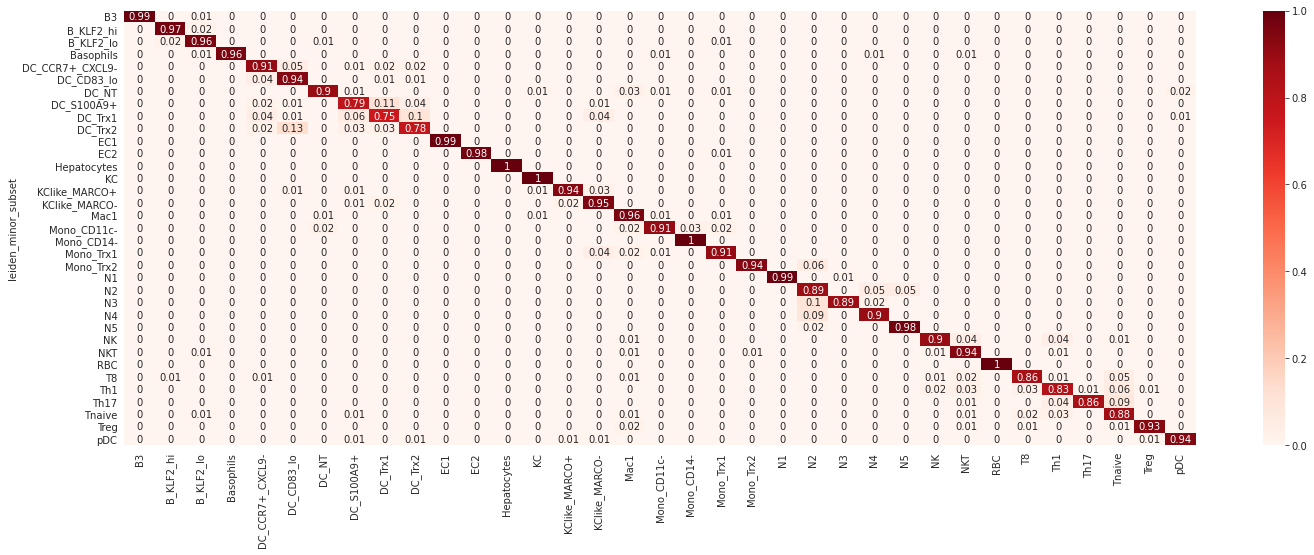

In [83]:
np.hstack((adata.obs.leiden_minor_subset, nb_probs))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

# Remember to update the NPZ file in the line below!!!! ⚠️

# Load classifier log-likelihoods, distinguish from Lung --> Tox

In [35]:
logls = np.load('backups/loglikelihoods_bay_classif_zilionis_classified_on_leiden_clusters_200518_21h09.npz', allow_pickle=True)

mostlikely_subset = pd.DataFrame(logls_lung['data'], index=logls_lung['index'], columns=logls_lung['columns']).idxmax()
mostlikely_subset_lung = pd.Series(mostlikely_subset_lung, dtype='category')
mostlikely_subset_lung.index = rzdata.obs.index

mostlikely_celltype_lung = mostlikely_subset_lung.map(coarse_annotation_dict).astype('category')

rzdata.obs['leiden_cell_type'] = mostlikely_celltype_lung
rzdata.obs['leiden_minor_subset'] = mostlikely_subset_lung

In [36]:
rzdata.obs.leiden_cell_type.cat.categories

#np.where(rzdata.obs.leiden_minor_subset.map(coarse_annotation_dict).astype('category').isna())
#rzdata.obs.iloc[[ 305, 4746, 9669, 9820, 9842, 9863],:]

Index(['B cells', 'Basophils', 'Endothelial cells', 'MoMacDC', 'NK cells',
       'Neutrophils', 'T cells', 'pDC'],
      dtype='object')

# Major cell type level

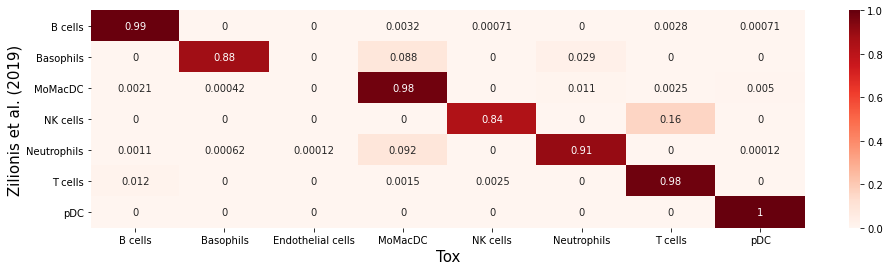

In [37]:
rz_to_tox_cell_type = rzdata.obs.groupby(['Major cell type', 'leiden_cell_type']).size().groupby(level=0).apply(lambda x : x/sum(x)).reset_index(name='fraction').pivot(index='Major cell type', columns='leiden_cell_type')
rz_to_tox_cell_type.columns = rz_to_tox_cell_type.columns.get_level_values('leiden_cell_type')


plt.figure(figsize=(16,4))
heatmap(rz_to_tox_cell_type, annot=True, cmap='Reds')

plt.ylabel('Zilionis et al. (2019)', fontsize=15)
plt.xlabel('Tox', fontsize=15)
#plt.xticks(rotation=45)


plt.show()

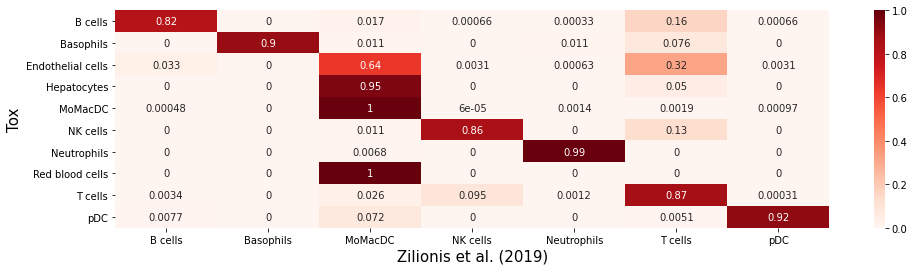

In [38]:
tox_to_rz_cell_type = adata.obs.groupby(['leiden_cell_type', 'cell_type']).size().groupby(level=0).apply(lambda x : x/sum(x)).reset_index(name='fraction').pivot(columns='leiden_cell_type', index='cell_type')
tox_to_rz_cell_type.columns = tox_to_rz_cell_type.columns.get_level_values('leiden_cell_type')


plt.figure(figsize=(16,4))

#transpose to keep direction of axes and still make it multiplicable
heatmap(tox_to_rz_cell_type.transpose(), annot=True, cmap='Reds')

plt.xlabel('Zilionis et al. (2019)', fontsize=15)
plt.ylabel('Tox', fontsize=15)

plt.show()

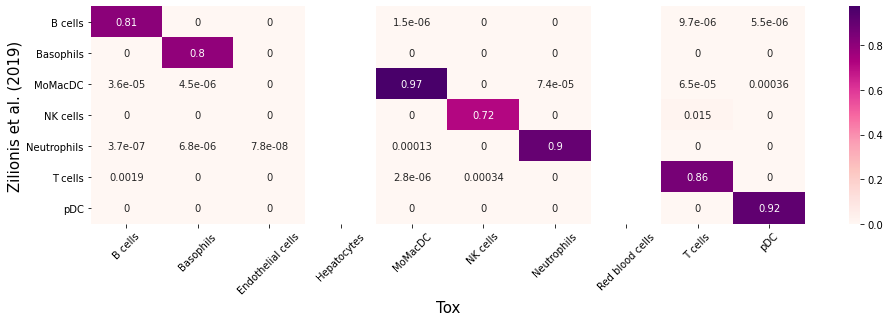

In [39]:
reciprocal_cell_type = rz_to_tox_cell_type * tox_to_rz_cell_type

plt.figure(figsize=(16,4))
heatmap(reciprocal_cell_type, annot=True, cmap='RdPu')

plt.ylabel('Zilionis et al. (2019)', fontsize=15)
plt.xlabel('Tox', fontsize=15)
plt.xticks(rotation=45)

plt.show()

# Minor subset level

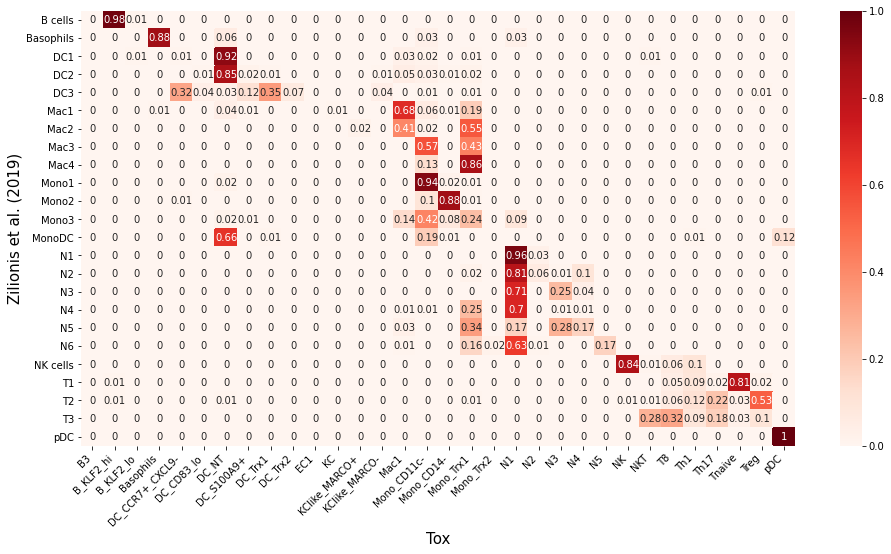

In [40]:
rz_to_tox_subset = rzdata.obs.groupby(['Minor subset', 'leiden_minor_subset']).size().groupby(level=0).apply(lambda x : x/sum(x)).reset_index(name='fraction').pivot(index='Minor subset', columns='leiden_minor_subset')
rz_to_tox_subset.columns = rz_to_tox_subset.columns.get_level_values('leiden_minor_subset')

plt.figure(figsize=(16,8))
heatmap(round(rz_to_tox_subset,2), annot=True, cmap='Reds')

plt.ylabel('Zilionis et al. (2019)', fontsize=15)
plt.xlabel('Tox', fontsize=15)
plt.xticks(rotation=45, horizontalalignment="right")

plt.show()

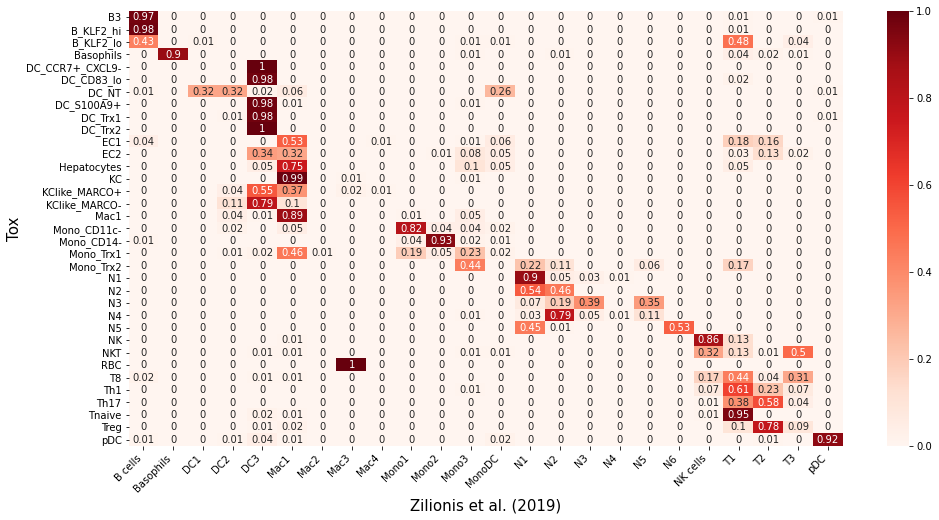

In [44]:
tox_to_rz_subset = adata.obs.groupby(['leiden_minor_subset', 'minor_subset']).size().groupby(level=0).apply(lambda x : x/sum(x)).reset_index(name='fraction').pivot(columns='leiden_minor_subset', index='minor_subset')
tox_to_rz_subset.columns = tox_to_rz_subset.columns.get_level_values('leiden_minor_subset')
tox_to_rz_subset = tox_to_rz_subset[sorted(tox_to_rz_subset)]


#tox_to_rz_subset.index.get_level_values('leiden_minor_subset')
plt.figure(figsize=(16,8))
heatmap(round(tox_to_rz_subset.transpose(),2), annot=True, cmap='Reds')

plt.xlabel('Zilionis et al. (2019)', fontsize=15)
plt.ylabel('Tox', fontsize=15)
plt.xticks(rotation=45, horizontalalignment="right")


plt.show()

#round(tox_to_rz_subset.transpose(),2).index.get_level_values('leiden_minor_subset')

In [45]:
tox_to_rz_subset.columns

CategoricalIndex(['B3', 'B_KLF2_hi', 'B_KLF2_lo', 'Basophils',
                  'DC_CCR7+_CXCL9-', 'DC_CD83_lo', 'DC_NT', 'DC_S100A9+',
                  'DC_Trx1', 'DC_Trx2', 'EC1', 'EC2', 'Hepatocytes', 'KC',
                  'KClike_MARCO+', 'KClike_MARCO-', 'Mac1', 'Mono_CD11c-',
                  'Mono_CD14-', 'Mono_Trx1', 'Mono_Trx2', 'N1', 'N2', 'N3',
                  'N4', 'N5', 'NK', 'NKT', 'RBC', 'T8', 'Th1', 'Th17',
                  'Tnaive', 'Treg', 'pDC'],
                 categories=['N4', 'Mono_Trx1', 'KC', 'NK', 'KClike_MARCO-', 'B_KLF2_lo', 'NKT', 'N3', ...], ordered=False, name='leiden_minor_subset', dtype='category')

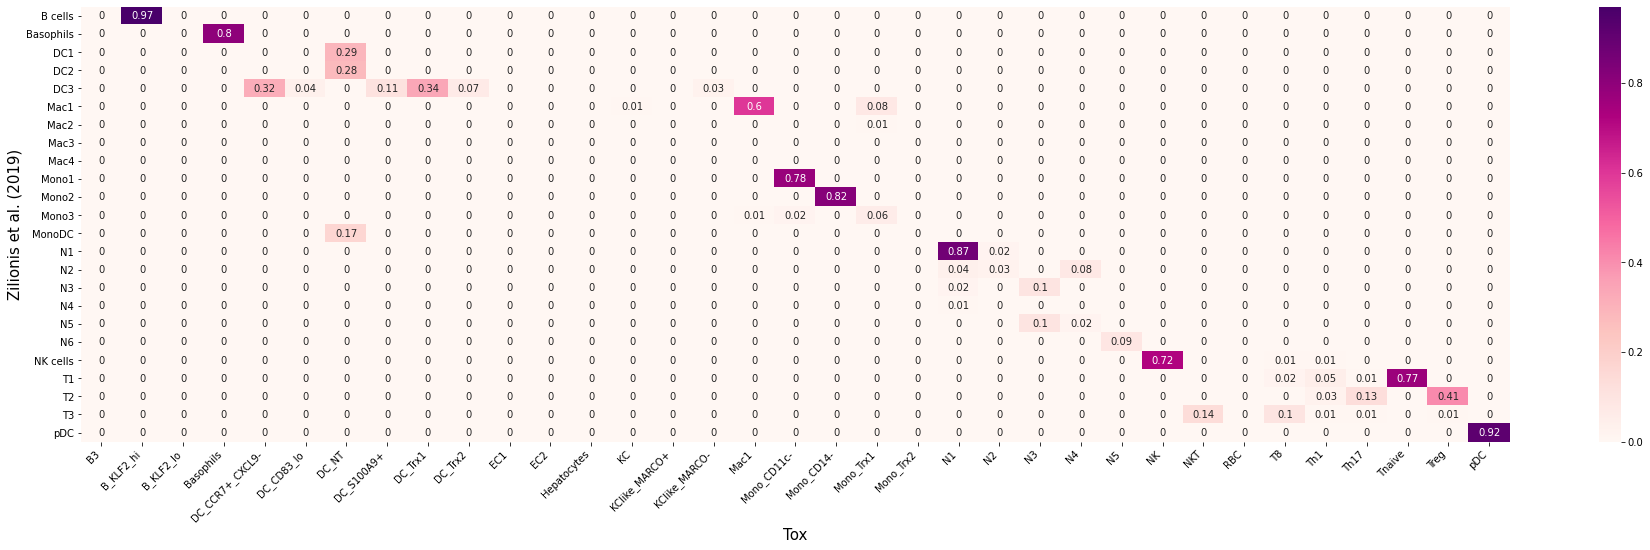

In [46]:
reciprocal_subset = rz_to_tox_subset * tox_to_rz_subset

plt.figure(figsize=(32,8))
heatmap(round(reciprocal_subset.fillna(0),2), annot=True, cmap='RdPu')

plt.ylabel('Zilionis et al. (2019)', fontsize=15)
plt.xlabel('Tox', fontsize=15)
plt.xticks(rotation=45, ha='right')
#plt.gca().xaxis.set_tick_params(ha='left')

plt.show()
